scenario: You have been hired as a data analyst for a banking institution that suspects fraudulent activities in the May ATM transactions in Northern Virginia. Your task is to analyze the provided transaction dataset using Power BI to identify potential outliers or anomalies that may indicate fraudulent behavior. You will load the data, prepare the data, explore the data, and provide a summary. 

In [5]:
import pandas as pd
import numbers as np
import seaborn as sns
import matplotlib.pyplot as plt

atm_transaction_df = pd.read_excel(r'atm_transactions.xlsx', sheet_name="atm_transactions")
atm_transaction_df.describe()

,transaction_id,transaction_amount,daily_average_balance,transaction_date_time
count,100.000000,100.000000,100.000000,100
mean,1049.500000,392.240000,55254.577000,2024-05-15 21:43:41.549999872
min,1000.000000,10.000000,1014.330000,2024-05-01 12:27:02
25%,1024.750000,103.750000,3492.495000,2024-05-08 18:27:35.249999872
50%,1049.500000,285.000000,6341.850000,2024-05-15 22:44:32.500000
75%,1074.250000,410.000000,7867.735000,2024-05-22 12:40:38.500000
max,1099.000000,4618.000000,1000000.000000,2024-06-01 00:31:45
std,29.011492,688.625202,217845.500224,NaN


In [18]:
data_df = atm_transaction_df[
    ((atm_transaction_df['transaction_date_time'] > '2024-04-30') & (atm_transaction_df['transaction_date_time']<'2024-06-01'))]
data_df.describe()

,transaction_id,transaction_amount,daily_average_balance,transaction_date_time
count,99.000000,99.000000,99.000000,99
mean,1050.000000,392.717172,55800.859091,2024-05-15 17:49:16.060606464
min,1001.000000,10.000000,1014.330000,2024-05-01 12:27:02
25%,1025.500000,102.500000,3504.070000,2024-05-08 18:25:41.500000
50%,1050.000000,280.000000,6457.750000,2024-05-15 17:30:59
75%,1074.500000,410.000000,7871.180000,2024-05-22 10:52:30
max,1099.000000,4618.000000,1000000.000000,2024-05-31 12:27:44
std,28.722813,692.113062,218885.282040,NaN


# data visualizations

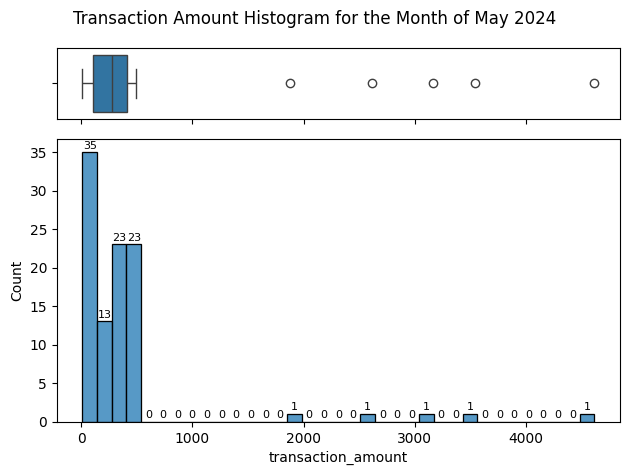

In [26]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, height_ratios=[1,4])

sns.boxplot(data= data_df["transaction_amount"], ax=ax1, orient='h')
histplot = sns.histplot(data= data_df["transaction_amount"], ax=ax2)
fontdict= {"size":8}
for p in histplot.patches:
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width() / 2., height + 0.5, int(height), ha="center",fontdict=fontdict)
fig.suptitle("Transaction Amount Histogram for the Month of May 2024")
plt.tight_layout()
plt.show()



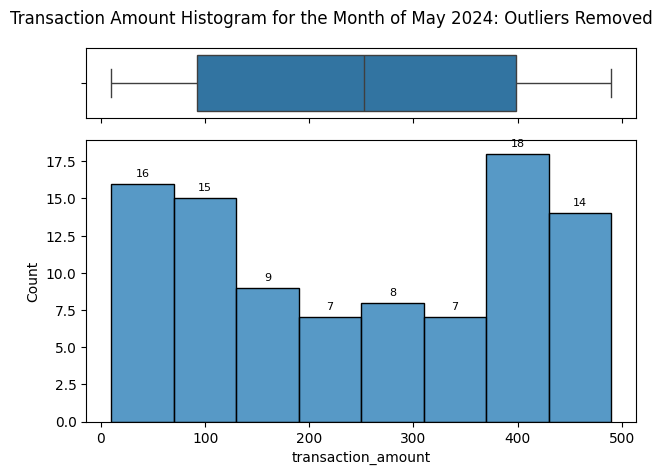

,transaction_id,customer_id,transaction_amount,daily_average_balance,branch_location,transaction_date_time
10,1016,CUST0019,3166,6652.37,"McLean,VA",2024-05-26 10:24:31
66,1064,CUST0017,3539,1981.09,"Centreville,VA",2024-05-11 15:23:08
67,1045,CUST0005,2618,5707.36,"Centreville,VA",2024-05-11 09:56:25
69,1051,CUST0002,1878,2050.38,"Leesburg,VA",2024-05-10 10:02:51
79,1059,CUST0016,4618,2594.83,"McLean,VA",2024-05-07 12:13:22


In [76]:

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, height_ratios=[1,4])
Q1 = data_df["transaction_amount"].quantile(0.25)
Q3 = data_df["transaction_amount"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# transaction amount outliers removed
trx_amt_ou_rm =  data_df[((data_df["transaction_amount"]>=lower_bound) & (data_df["transaction_amount"]<=upper_bound))]

sns.boxplot(data= trx_amt_ou_rm["transaction_amount"], ax=ax1, orient='h')
histplot = sns.histplot(data= trx_amt_ou_rm["transaction_amount"], ax=ax2)
fontdict= {"size":8}
for p in histplot.patches:
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width() / 2., height + 0.5, int(height), ha="center",fontdict=fontdict)
fig.suptitle("Transaction Amount Histogram for the Month of May 2024: Outliers Removed")
plt.tight_layout()
plt.show()

data_df[~((data_df["transaction_amount"]>=lower_bound) & (data_df["transaction_amount"]<=upper_bound))]

In [80]:
trx_amt_ou_rm.describe()

,transaction_id,transaction_amount,daily_average_balance,transaction_date_time
count,94.000000,94.000000,94.000000,94
mean,1050.159574,245.319149,58567.010851,2024-05-15 20:42:18.648936192
min,1001.000000,10.000000,1014.330000,2024-05-01 12:27:02
25%,1025.250000,92.500000,3754.577500,2024-05-08 18:23:47.750000128
50%,1049.500000,252.500000,6536.130000,2024-05-16 08:52:32.500000
75%,1075.750000,398.750000,7917.970000,2024-05-22 10:59:26.500000
max,1099.000000,490.000000,1000000.000000,2024-05-31 12:27:44
std,29.217134,157.281695,224350.781175,NaN


In [78]:
data_df.describe()

,transaction_id,transaction_amount,daily_average_balance,transaction_date_time
count,99.000000,99.000000,99.000000,99
mean,1050.000000,392.717172,55800.859091,2024-05-15 17:49:16.060606464
min,1001.000000,10.000000,1014.330000,2024-05-01 12:27:02
25%,1025.500000,102.500000,3504.070000,2024-05-08 18:25:41.500000
50%,1050.000000,280.000000,6457.750000,2024-05-15 17:30:59
75%,1074.500000,410.000000,7871.180000,2024-05-22 10:52:30
max,1099.000000,4618.000000,1000000.000000,2024-05-31 12:27:44
std,28.722813,692.113062,218885.282040,NaN


In [83]:
data_df["daily_average_balance"].median()

np.float64(6457.75)

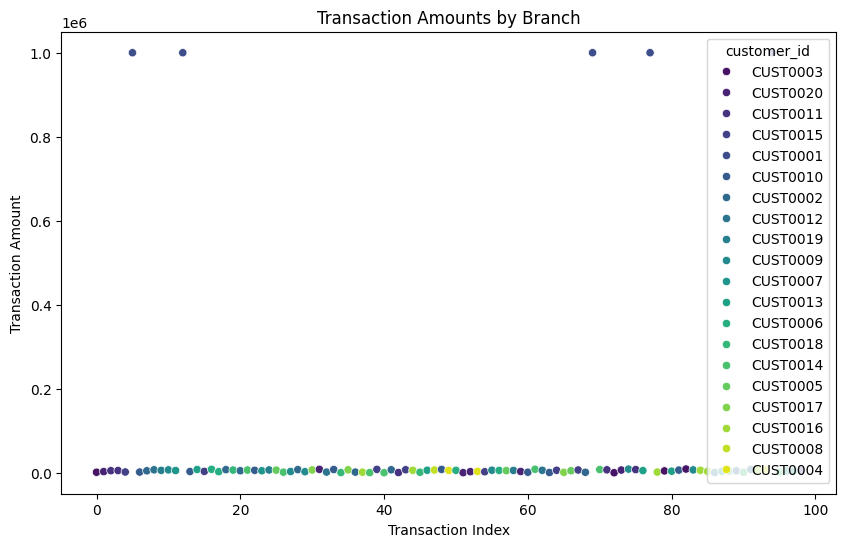

In [64]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=range(len(data_df)), y='daily_average_balance', hue='customer_id', data=data_df, palette='viridis')

# Set the title and labels
plt.title('Transaction Amounts by Branch')
plt.xlabel('Transaction Index')
plt.ylabel('Transaction Amount')

# Show the plot
plt.show()

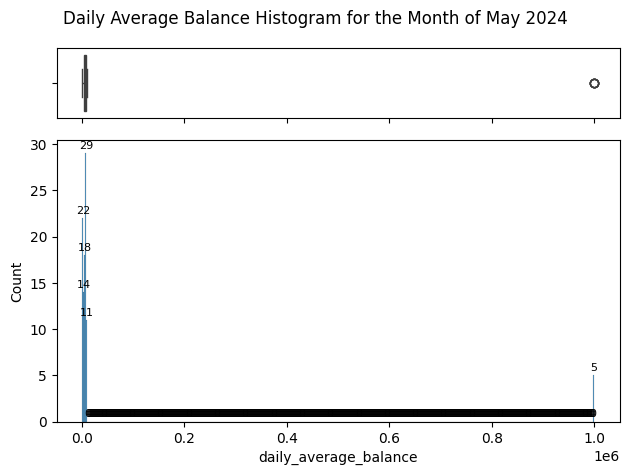

In [28]:

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, height_ratios=[1,4])

sns.boxplot(data= data_df["daily_average_balance"], ax=ax1, orient='h')
histplot = sns.histplot(data= data_df["daily_average_balance"], ax=ax2)
fontdict= {"size":8}
for p in histplot.patches:
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width() / 2., height + 0.5, int(height), ha="center",fontdict=fontdict)
fig.suptitle("Daily Average Balance Histogram for the Month of May 2024")
plt.tight_layout()
plt.show()

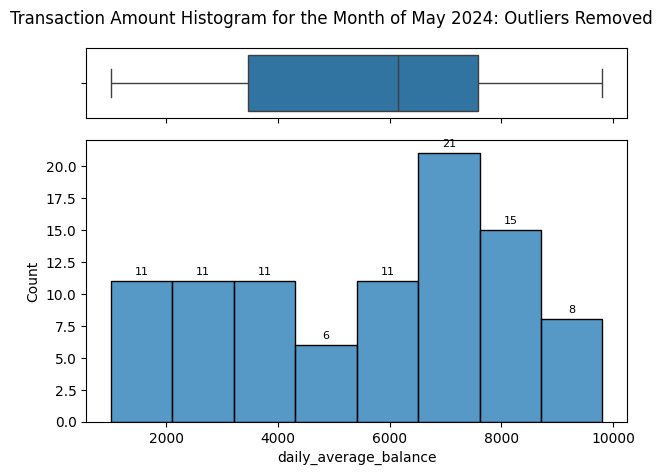

,transaction_id,customer_id,transaction_amount,daily_average_balance,branch_location,transaction_date_time
6,1063,CUST0001,10,1000000.0,"McLean,VA",2024-05-28 01:32:26
13,1058,CUST0001,10,1000000.0,"Leesburg,VA",2024-05-25 10:45:44
70,1013,CUST0001,10,1000000.0,"Chantilly,VA",2024-05-09 11:59:13
78,1005,CUST0001,10,1000000.0,"Chantilly,VA",2024-05-07 21:19:06
95,1086,CUST0001,10,1000000.0,"McLean,VA",2024-05-03 06:21:46


In [85]:

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, height_ratios=[1,4])
Q1 = data_df["daily_average_balance"].quantile(0.25)
Q3 = data_df["daily_average_balance"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# transaction amount outliers removed
trx_amt_ou_rm =  data_df[((data_df["daily_average_balance"]>lower_bound) & (data_df["daily_average_balance"]<upper_bound))]

sns.boxplot(data= trx_amt_ou_rm["daily_average_balance"], ax=ax1, orient='h')
histplot = sns.histplot(data= trx_amt_ou_rm["daily_average_balance"], ax=ax2)
fontdict= {"size":8}
for p in histplot.patches:
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width() / 2., height + 0.5, int(height), ha="center",fontdict=fontdict)
fig.suptitle("Transaction Amount Histogram for the Month of May 2024: Outliers Removed")
plt.tight_layout()
plt.show()


data_df[~((data_df["daily_average_balance"]>lower_bound) & (data_df["daily_average_balance"]<upper_bound))]

In [87]:

print(trx_amt_ou_rm["daily_average_balance"].median())
trx_amt_ou_rm.describe()

6149.73


,transaction_id,transaction_amount,daily_average_balance,transaction_date_time
count,94.000000,94.000000,94.000000,94
mean,1050.265957,413.074468,5577.500532,2024-05-15 18:58:55.691489024
min,1001.000000,30.000000,1014.330000,2024-05-01 12:27:02
25%,1026.250000,121.250000,3470.765000,2024-05-08 19:03:21
50%,1049.500000,292.500000,6149.730000,2024-05-15 22:44:32.500000
75%,1074.750000,413.750000,7585.050000,2024-05-22 07:18:27.750000128
max,1099.000000,4618.000000,9806.580000,2024-05-31 12:27:44
std,28.571802,704.613754,2520.427286,NaN


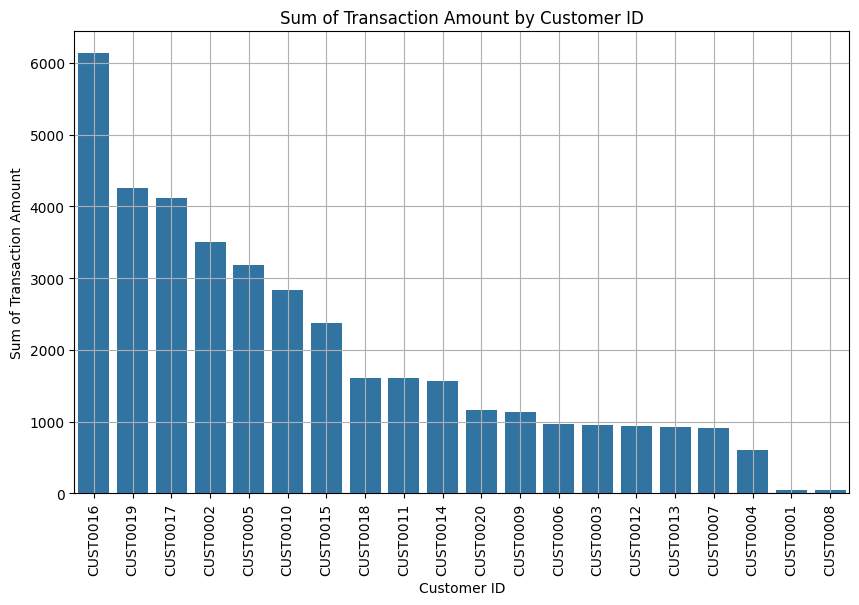

In [44]:
sum_of_trx_by_cust = pd.read_csv(r'Sum of transaction_amount by customer_id.csv')
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='customer_id', y='Sum of transaction_amount', data=sum_of_trx_by_cust)

# Set the title and labels
plt.title('Sum of Transaction Amount by Customer ID')
plt.xlabel('Customer ID')
plt.ylabel('Sum of Transaction Amount')
plt.grid(visible=True)
# Show the plot
plt.xticks(rotation=90)
plt.show()

   customer_id  Sum of daily_average_balance
0     CUST0015                      48211.07
1     CUST0002                      45964.38
2     CUST0010                      41816.63
3     CUST0009                      39540.23
4     CUST0013                      35658.75
5     CUST0014                      32504.94
6     CUST0016                      30547.85
7     CUST0011                      29926.61
8     CUST0020                      28884.85
9     CUST0012                      26201.00
10    CUST0006                      25896.31
11    CUST0019                      22302.78
12    CUST0004                      19337.08
13    CUST0005                      18918.97
14    CUST0003                      18333.13
15    CUST0018                      18067.98
16    CUST0017                      17499.66
17    CUST0007                      17125.71
18    CUST0008                       7547.12


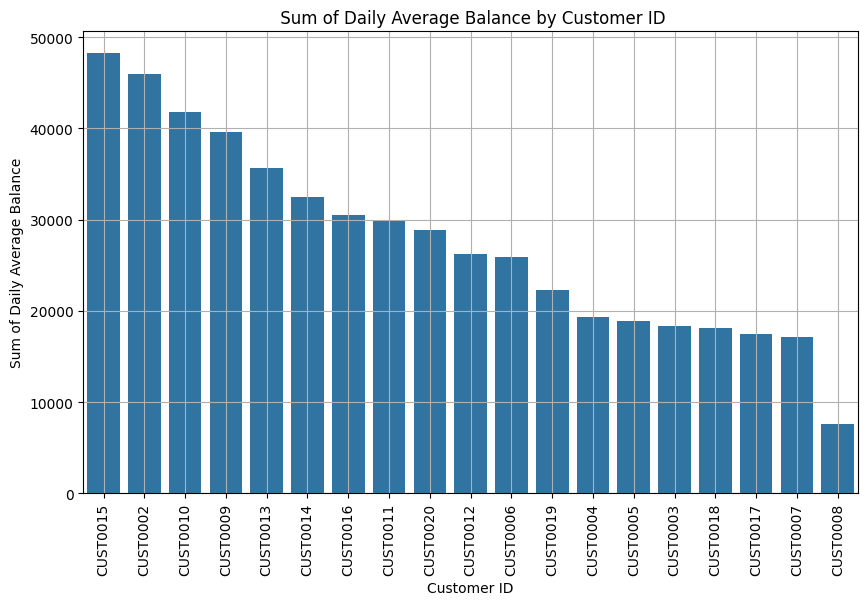

In [65]:

sum_of_avg_bal_by_cust = pd.read_csv(r'sum_daily_average_balance.csv')
print(sum_of_avg_bal_by_cust)
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='customer_id', y='Sum of daily_average_balance', data=sum_of_avg_bal_by_cust)

# Set the title and labels
plt.title(' Sum of Daily Average Balance by Customer ID')
plt.xlabel('Customer ID')
plt.ylabel('Sum of Daily Average Balance')
plt.grid(visible=True)
# Show the plot
plt.xticks(rotation=90)
plt.show()

  branch_location  Count of transaction_amount
0     Leesburg,VA                           22
1  Centreville,VA                           19
2      Fairfax,VA                           18
3       McLean,VA                           14
4    Arlington,VA                           13
5    Chantilly,VA                           13


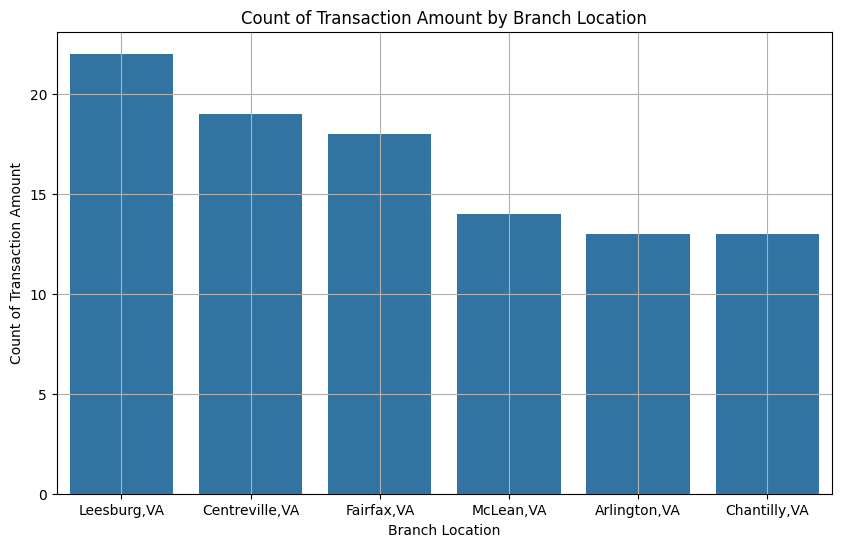

In [66]:
c_tra_amt_by_branch_location = pd.read_csv(r'count_of_transaction_amount_by_branch_location.csv')
print(c_tra_amt_by_branch_location)
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='branch_location', y='Count of transaction_amount', data=c_tra_amt_by_branch_location)

# Set the title and labels
plt.title('Count of Transaction Amount by Branch Location')
plt.xlabel('Branch Location')
plt.ylabel('Count of Transaction Amount')
plt.grid(visible=True)
# Show the plot
# plt.xticks(rotation=90)
plt.show()

In [71]:
# data_df.head()
frequency_distribution = data_df['transaction_amount'].value_counts().sort_index()
df['Binned'] = pd.cut(df['TransactionAmount'], bins=bins, labels=labels, right=False)
frequency_distribution = df['Binned'].value_counts().sort_index()
# # # Print the frequency distribution
print(frequency_distribution)

transaction_amount
10      5
30      1
40      4
45      2
50      2
       ..
1878    1
2618    1
3166    1
3539    1
4618    1
Name: count, Length: 64, dtype: int64
